In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

In [13]:
df= pd.read_csv('perrin-freres-monthly-champagne.csv',
                index_col='Month', parse_dates=True, skipfooter=2)

/Users/maria/opt/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [14]:
df.tail()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [4]:
df.index.freq = 'MS'

In [15]:
df.columns = ['Sales']

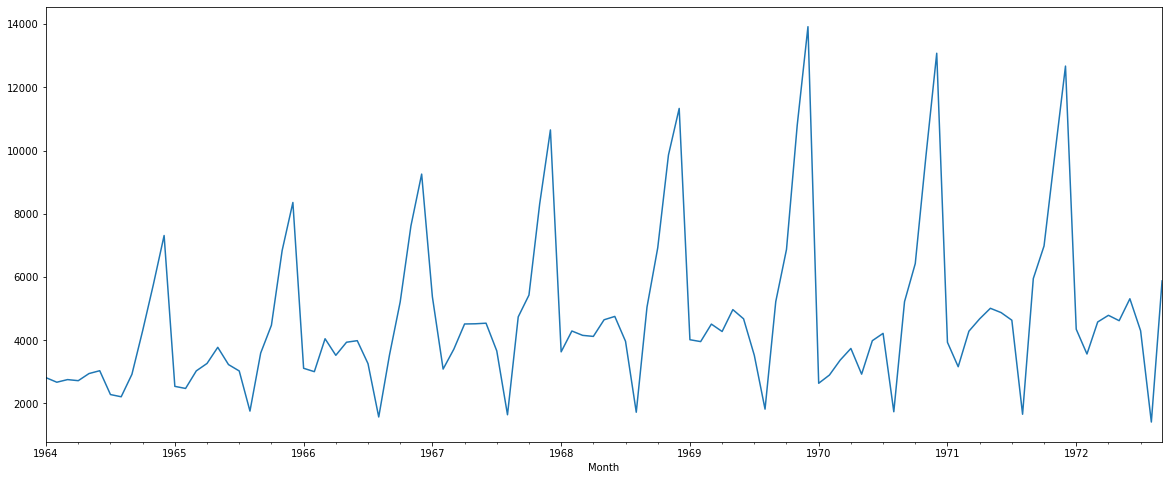

In [16]:
df['Sales'].plot(figsize=(20,8))

In [12]:
df.shape

(105, 1)

In [17]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [18]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
hw = ExponentialSmoothing(
    train['Sales'],
    initialization_method='legacy-heuristic',
    trend='add',seasonal='add',seasonal_periods=12
)
res_hw = hw.fit()

/Users/maria/opt/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

In [24]:
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)

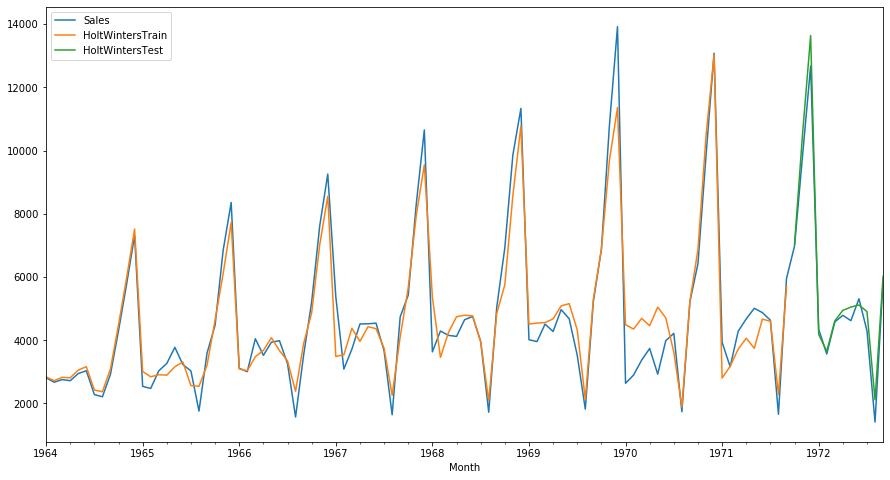

In [25]:
df[['Sales','HoltWintersTrain','HoltWintersTest']].plot(figsize=(15,8));

In [26]:
r2_score(train['Sales'], res_hw.fittedvalues)

0.9173433418354158

In [28]:
r2_score(test['Sales'], res_hw.forecast(Ntest))

0.9735679986862097